In [1]:
import GI_parser as GIP
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time
import math
import numba
import sys




s1x1=121
s1x2=231

s1y1=140
s1y2=250

s2x1=28
s2x2=138

s2y1=21
s2y2=131

In [2]:
start=time.time()

loaded=np.load("frames_dino_b3_1_W0028_F03-.npz")
frames=loaded["frames"]

In [3]:
frames.shape


(9976, 256, 256)

In [4]:
@numba.njit(parallel=True)
def ghostPixel(frames):
    
    ghost=np.zeros(shape=(110,110),dtype=np.double)
    

    nframes=9900
    
    
    #buckets = frames[:,s1x1:s1x2,s1y1:s1y2].sum(axis=(1,2))
    
    buckets=[]
    
    for i in range(nframes):
        buckets.append(np.sum(frames[i,s1x1:s1x2,s1y1:s1y2]))
    
    
    for i in numba.prange(110):
        for j in numba.prange(110):
            term1=0
            term2=0
            term3=0
            #This loop goes over 10000 frames
            for frame_ct in numba.prange(nframes):

                #This is I_i
                beam1_bucket=np.double(buckets[frame_ct])

                #This is S_i
                beam2_pixel=np.double(frames[frame_ct,s2x1+i,s2y1+j])
                #Where i is the index of a frame (frame_ct in code)
                #Note that this 'i' is not the same as  the 'i' in the first for-loop above. This 'i' is the x coordinate of the image



                term1+=beam1_bucket*beam2_pixel
                term2+=beam1_bucket
                term3+=beam2_pixel




            #After the three summations have been assembled, put them into formula (3) to produce the ghost image at the [i,j] coordinate 
            ghost[i,j]=term1/nframes-(term2*term3)/ (nframes ** 2)
    return ghost






In [5]:
test=ghostPixel(frames)

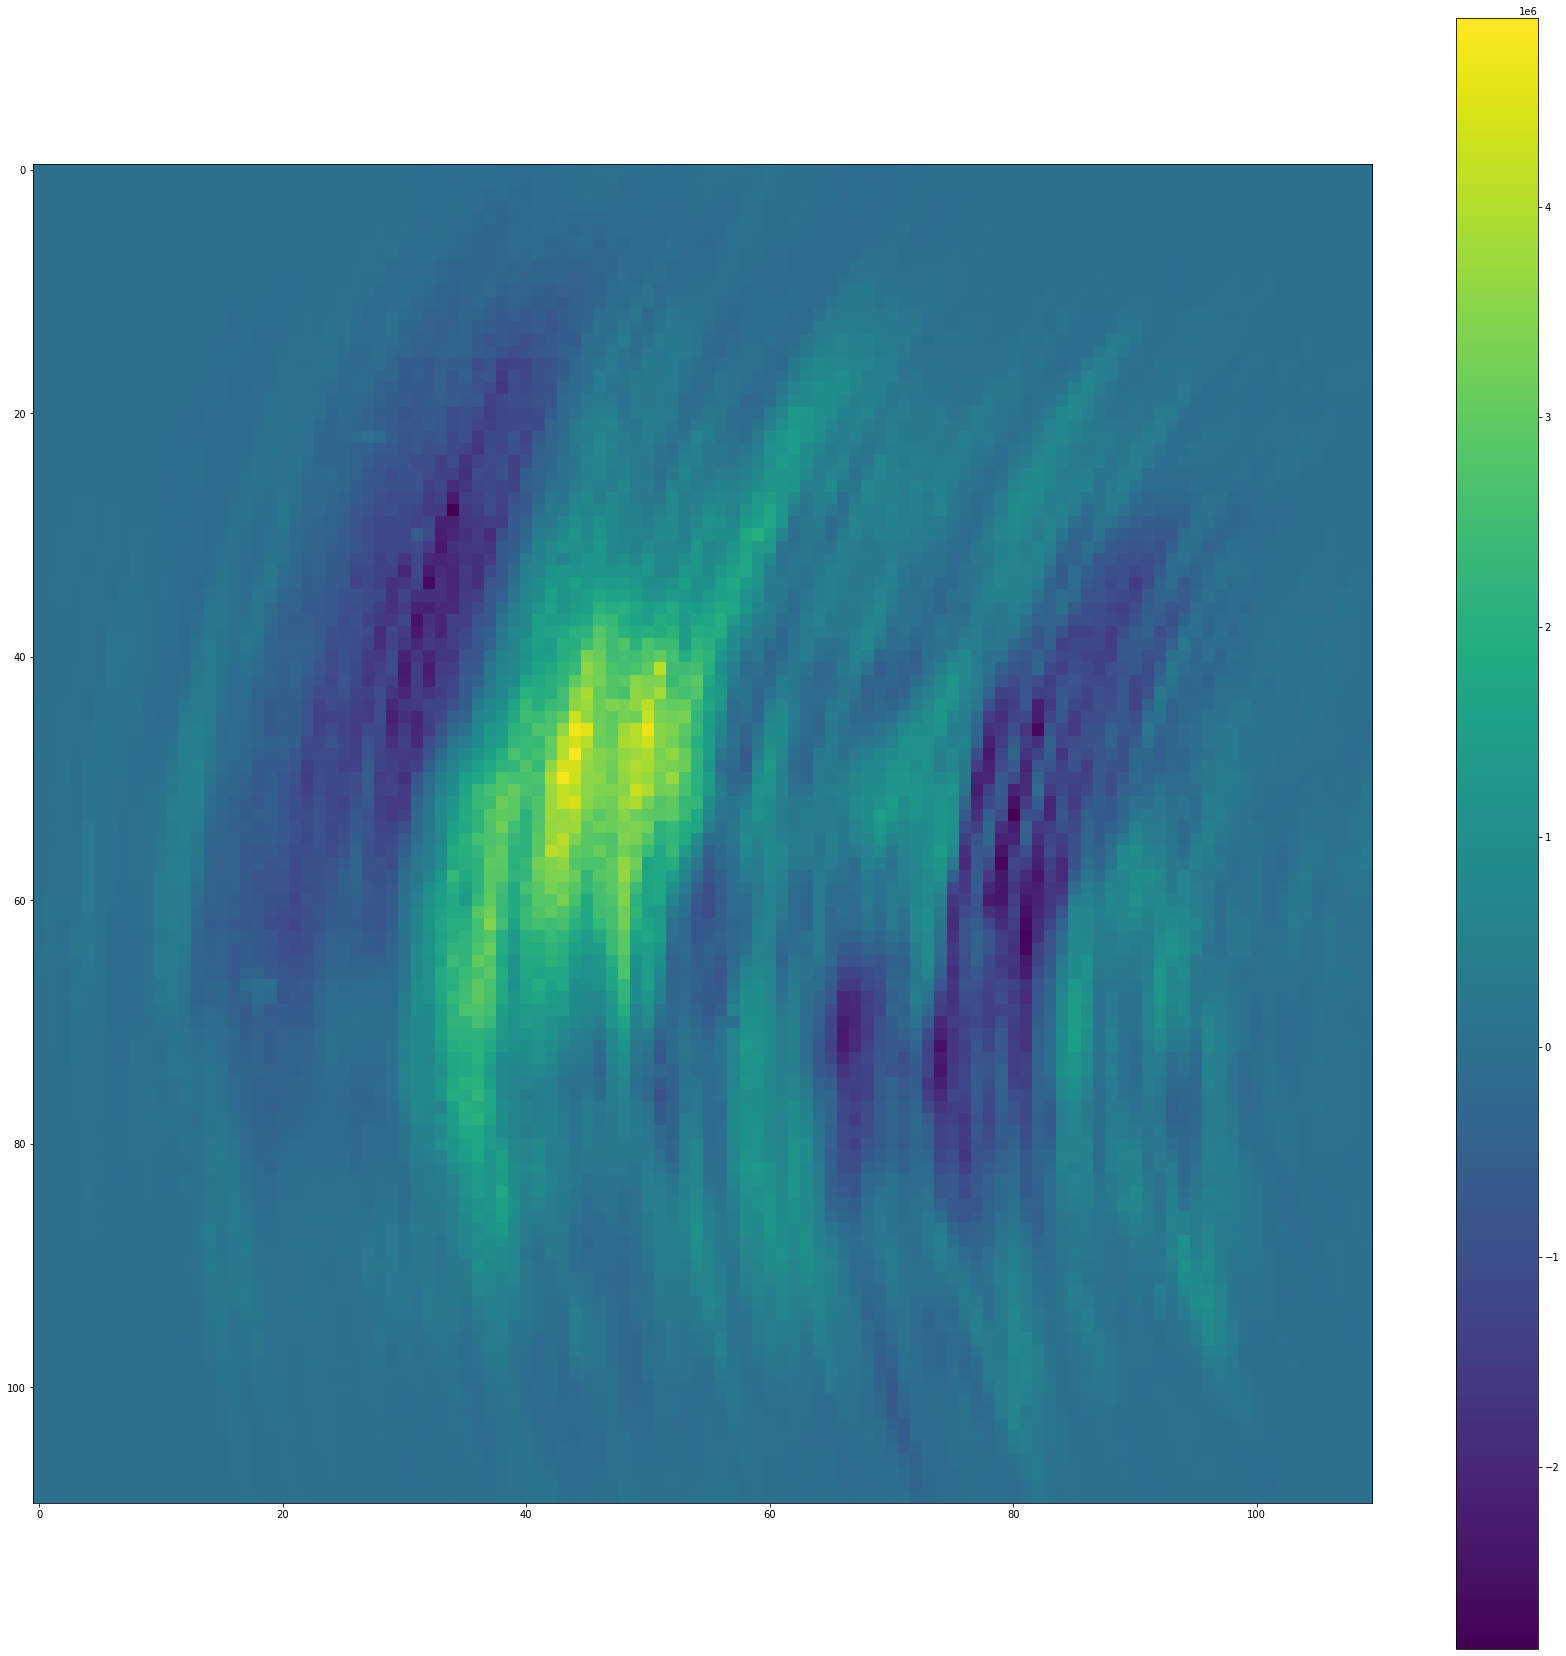

In [6]:
#Show the ghost
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(30, 30))
_=ax.imshow(test)
fig.colorbar(_)


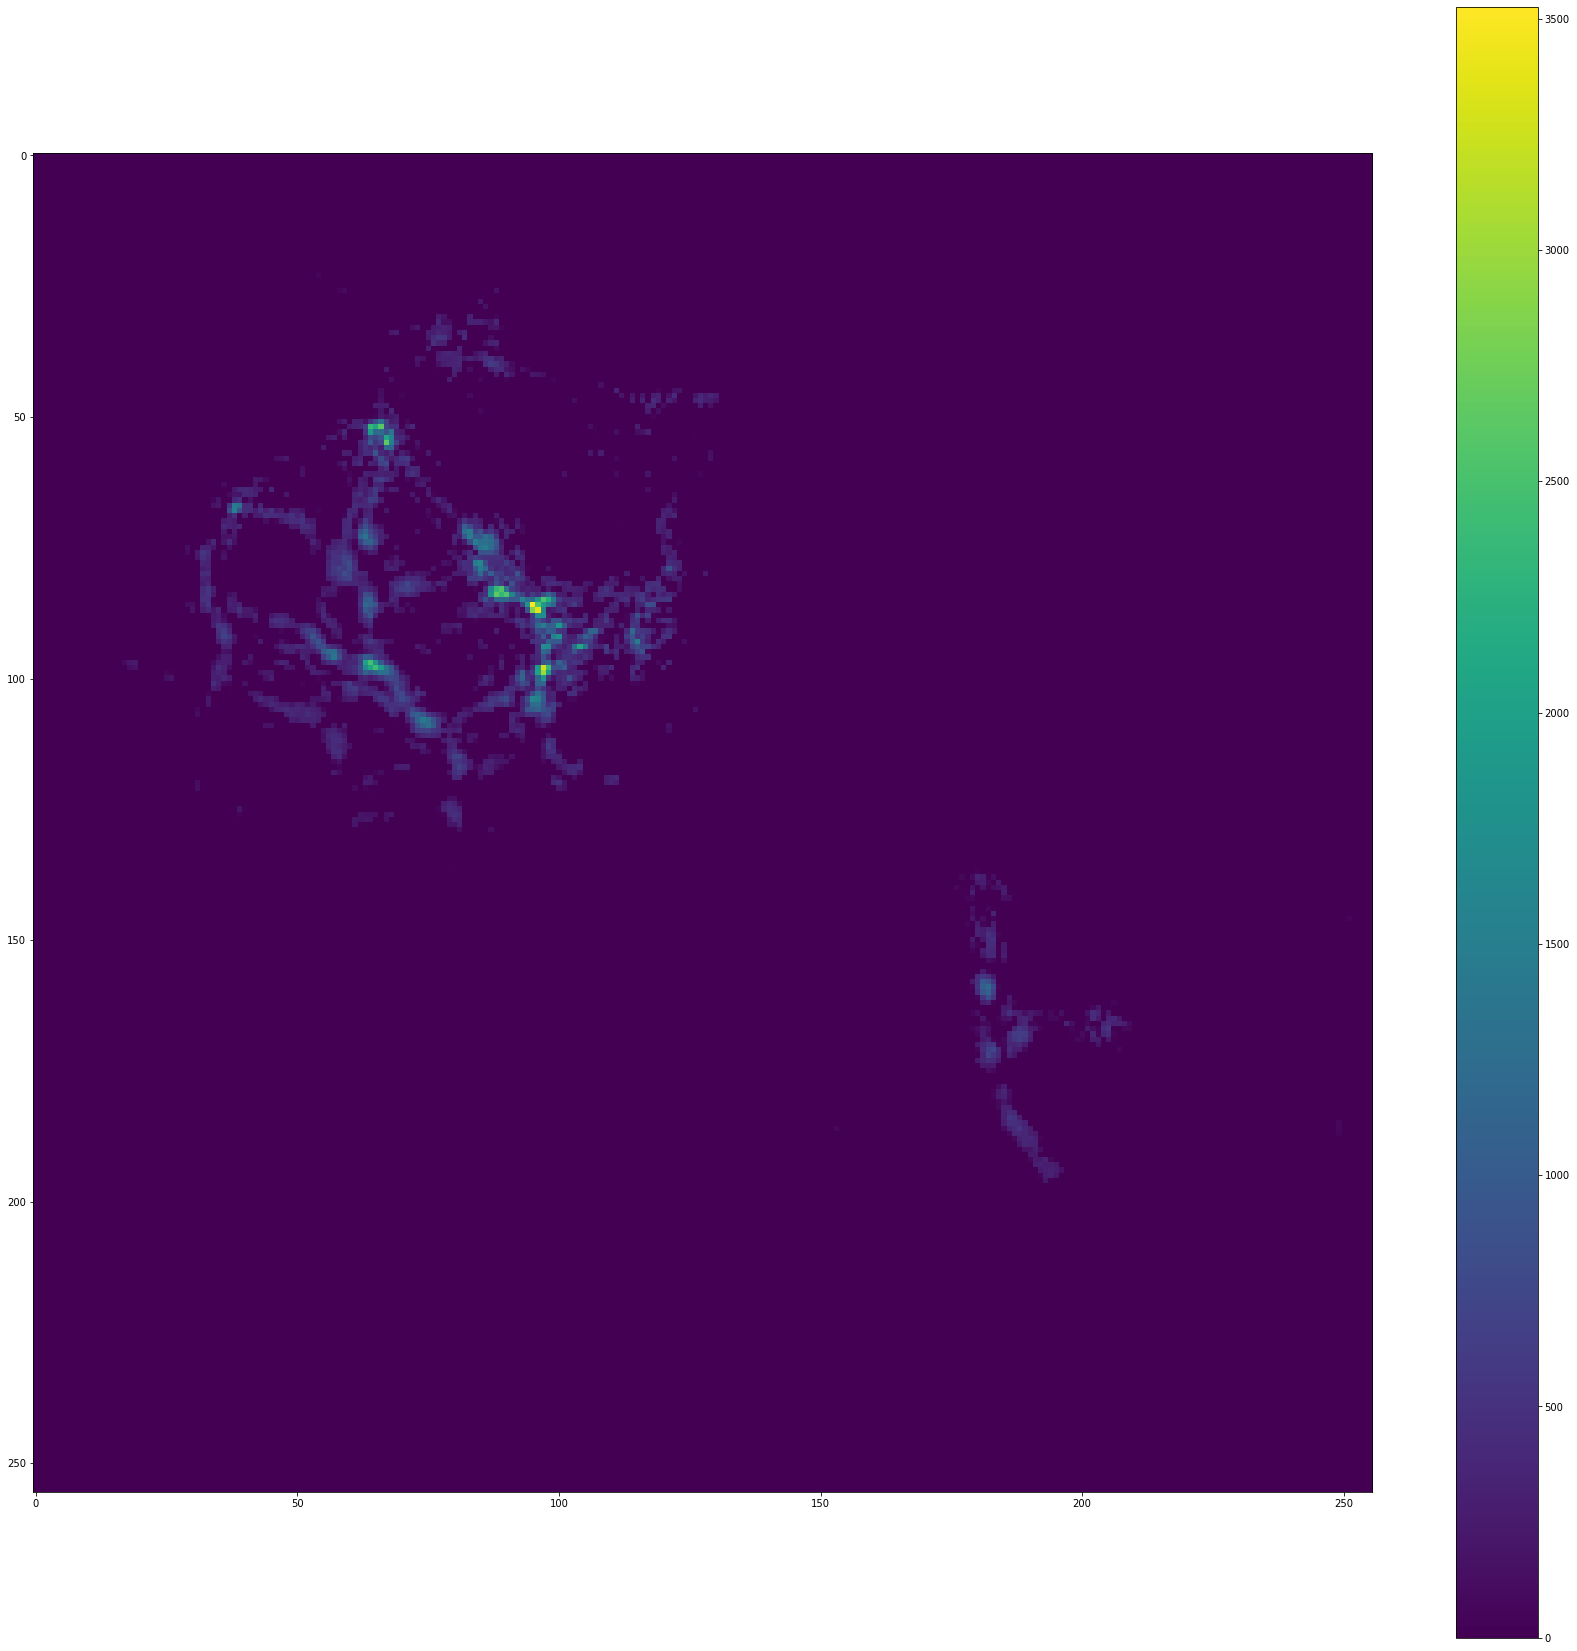

In [7]:


fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(30, 30))
_=ax.imshow(frames[5000,:,:])
fig.colorbar(_)

In [8]:
finish=time.time()
print(finish-start," seconds elapsed")
np.savetxt("ghost_numba.txt",test)

17.662020921707153  seconds elapsed
